# Comprehensive Study of DNA, RNA & Protein Measurements co-vary Predictive Machine Learning Techniques in Single Cells

- This notebook reproduces the figuress in Comprehensive Study of DNA, RNA & Protein Measurements co-vary Predictive Machine Learning Techniques in Single Cells research paper.

- Environment: Google Colab
- Dependency: SciencePlots
- Data: https://raw.githubusercontent.com/jingwora/Comprehensive-Study-of-DNA-RNA-Protein-Measurements-co-vary-Predictive-Machine-Learning-Technique/main/data/solution_summary.csv

# Environment Setting

In [1]:
!pip install -q SciencePlots

In [2]:
!sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpotrace0 libptexenc1 libruby2.5 libsynctex1
  libtexlua52 libtexluajit2 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto ghostscript-x apach

In [3]:
# Library Load

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import scienceplots

plt.style.use('seaborn')
plt.style.use(['science','ieee'])

## Data Load

In [4]:
!curl -O https://raw.githubusercontent.com/jingwora/Comprehensive-Study-of-DNA-RNA-Protein-Measurements-co-vary-Predictive-Machine-Learning-Technique/main/data/solution_summary.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9366  100  9366    0     0  53827      0 --:--:-- --:--:-- --:--:-- 53827


In [5]:
# Set path
root         = "/content/"
figures_path = "/content/figures/"

!mkdir $figures_path

In [6]:
# Load file

file_path = f"{root}/solution_summary.csv"
input_df = pd.read_csv(file_path)
input_df

input_df

,Problems,Process,Group,Techniques,1,2,3,4,5,6,7,8,11,12
0,Multiome,Features Creation,Features Creation,Date,○,NaN,NaN,NaN,NaN,NaN,NaN,○,NaN,NaN
1,Multiome,Features Creation,Features Creation,Gender,○,NaN,NaN,NaN,NaN,NaN,NaN,○,NaN,NaN
2,Multiome,Features Creation,Features Creation,Cell-type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Multiome,Features Creation,Features Creation,Chromosomes,NaN,○,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Multiome,Features Creation,Features Creation,Mean features by donor,NaN,NaN,NaN,NaN,NaN,NaN,○,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,CITEseq,Ensemble,Ensemble,Weighted average,○,NaN,○,NaN,NaN,○,NaN,NaN,○,NaN
128,CITEseq,Ensemble,Ensemble,Batch by gender,○,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,CITEseq,Ensemble,Ensemble,Batch by day,○,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,CITEseq,Ensemble,Ensemble,Stacking Model,NaN,NaN,NaN,NaN,○,○,NaN,NaN,NaN,NaN


In [7]:
# Preprocessing

def precrocess(df):

  df = df.replace("○", 1)
  df = df.fillna(0)

  # Drop No. of fold
  df = df[df["Techniques"] != "No. of fold"]

  # Sum
  cols = ['1', '2', '3', '4', '5', '6', '7', '8', '11', '12']
  df['Frequency'] = df[cols].sum(axis=1).astype("int")

  # Select columns
  df = df[["Problems", "Process", "Group", "Techniques", "Frequency"]]

  # Create list
  problems = list(df["Problems"].unique())
  processes = list(df["Process"].unique())
  groups = list(df["Group"].unique())

  # Show result
  print(problems)
  print(processes)
  print(groups)

  return df


df = precrocess(input_df)
df

['Multiome', 'CITEseq']
['Features Creation', 'Features Pre-processing', 'Models', 'Cross validation', 'Hyperparameter tuning', 'Ensemble']
['Features Creation', 'Scaling', 'Feature Reduction', 'Feature Selection', 'Neural Network', 'Boosting algorithm', 'Linear Regression', 'Cross validation', 'Hyperparameter tuning', 'Ensemble']


,Problems,Process,Group,Techniques,Frequency
0,Multiome,Features Creation,Features Creation,Date,2
1,Multiome,Features Creation,Features Creation,Gender,2
2,Multiome,Features Creation,Features Creation,Cell-type,0
3,Multiome,Features Creation,Features Creation,Chromosomes,1
4,Multiome,Features Creation,Features Creation,Mean features by donor,1
...,...,...,...,...,...
127,CITEseq,Ensemble,Ensemble,Weighted average,4
128,CITEseq,Ensemble,Ensemble,Batch by gender,1
129,CITEseq,Ensemble,Ensemble,Batch by day,1
130,CITEseq,Ensemble,Ensemble,Stacking Model,2


## Figures1

In [8]:
from tables.group import Group

problems = list(df["Problems"].unique())
groups = list(df["Group"].unique())

def get_bar_chart(input_df):

  for problem in problems:
    
    problem_df = input_df[input_df["Problems"] == problem].copy()

    for group in groups:

      df = problem_df[problem_df["Group"] == group]
      df = df.sort_values(by=["Frequency"])
      df = df[df["Frequency"] > 0 ]   # only more than 0
      
      technique_count = len(df['Techniques'])
      fig = plt.figure(figsize =(3, technique_count/2))

      x = df['Techniques']
      y = df['Frequency']
      plt.barh(x, y)
      plt.title(f"{problem}: {group}")

      for index, value in enumerate(y):
          plt.text(value, index, str(value),  fontsize=12)
      
      plt.savefig(f'{figures_path}{problem}_{group}.png')
      plt.show()


get_bar_chart(df)

Output hidden; open in https://colab.research.google.com to view.

## Figure2

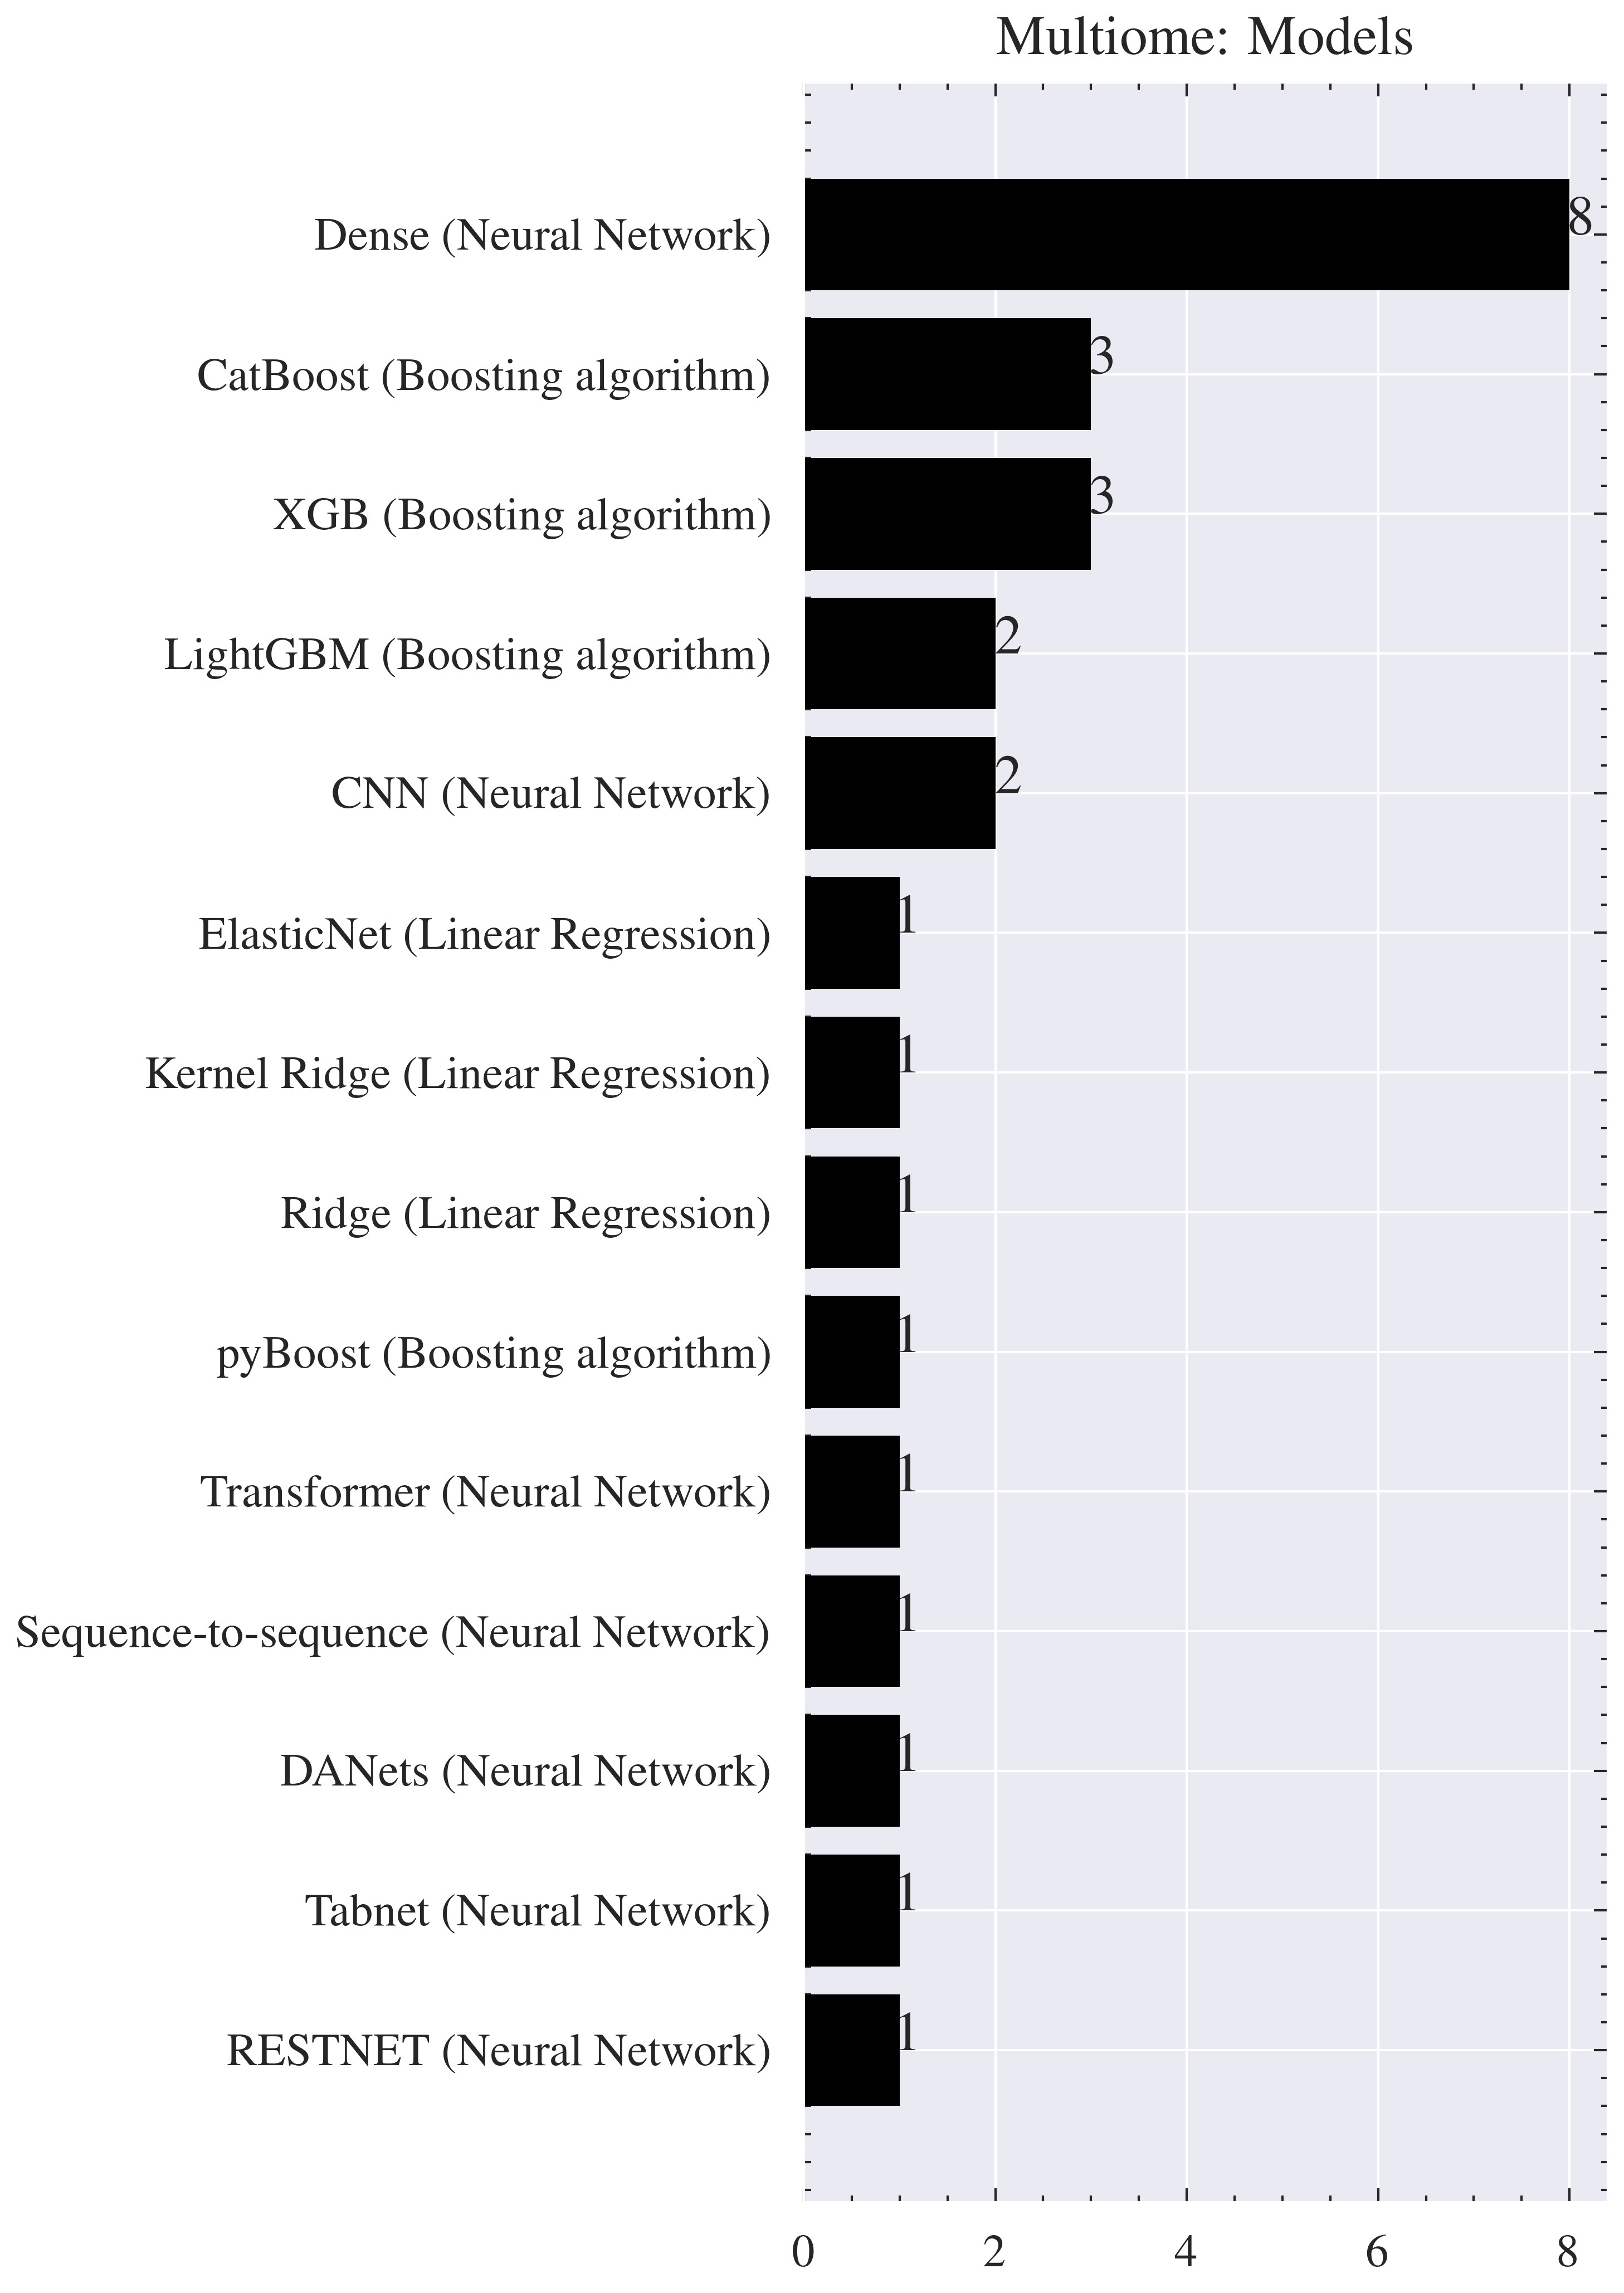

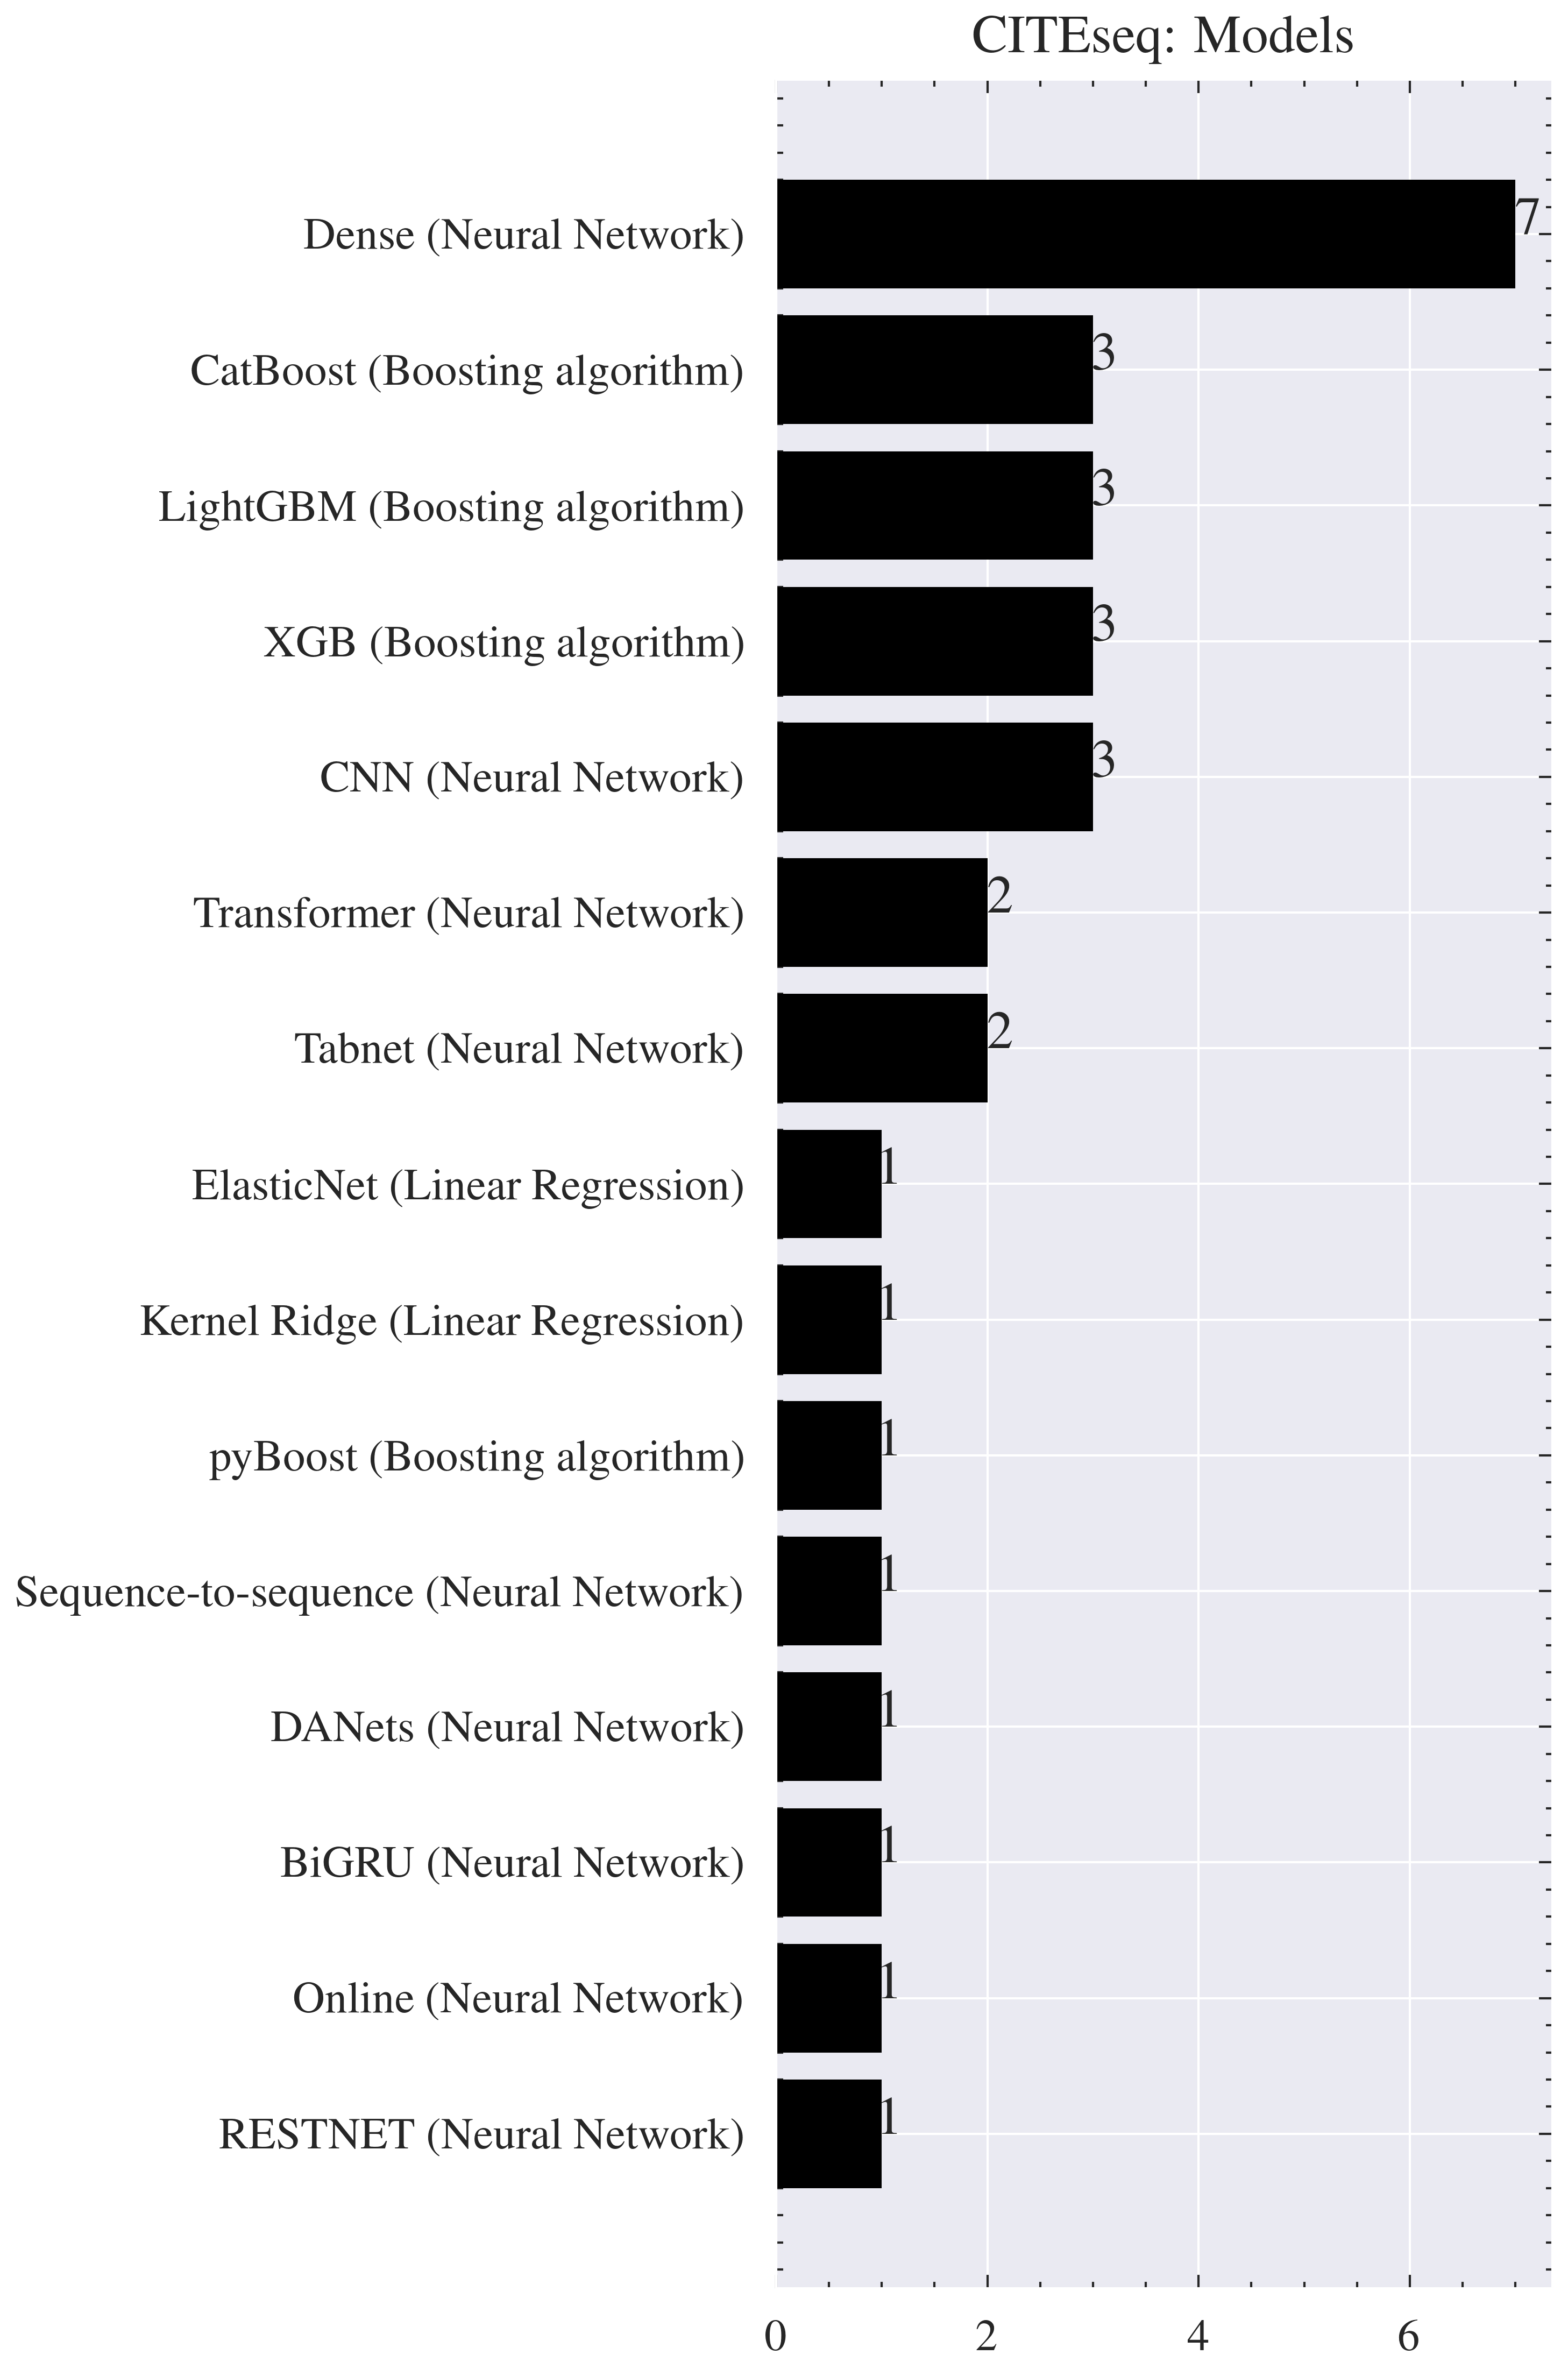

In [9]:
# Models

from tables.group import Group

def get_bar_chart(input_df):

  input_df = input_df[input_df["Process"] == "Models"].copy()

  for problem in problems:
    
    df = input_df[input_df["Problems"] == problem].copy()
    df = df.sort_values(by=["Frequency"])
    df = df[df["Frequency"] > 0 ]   # only more than 0

    technique_count = len(df['Techniques'])
    fig = plt.figure(figsize =(5, technique_count/2))

    df['Models'] = df['Techniques'] + " (" + df['Group'] + ")"

    x = df['Models']
    y = df['Frequency']

    plt.barh(x, y)
    plt.title(f"{problem}: Models")

    for index, value in enumerate(y):
        plt.text(value, index, str(value), fontsize=12)

    plt.tight_layout()
    plt.savefig(f'{figures_path}{problem}_Models.png')
    plt.show()

get_bar_chart(df)

## End